# PlaiCraft DSCI 100 Individual Planning

In this project, I will be analyzing data submitted by Frank Wood's Computer Science research group to create a system that can be used to predict one of their broad questions of choice. First, I will be loading in the tidyverse and ggplot2 R package for later.

In [4]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1. Inspecting the Datasets

Let's read in our two datasets and inspect what data we have to work with.

In [6]:
players_data <- read_csv("data/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


#### Description of the set:

The data in the "players.csv" file provided for PlaiCraft has 7 variables and 196 observations as listed at the top of the data table (196x7). The variables, their data type, and description of what they represent are listed below:
1. `experience`: *chr (character)* - determines the "level" of the players' gaming experience as a Beginner, Amateur, Veteran, or Pro (the most experienced)
2. `subscribe`: *lgl (logical)* - indicated with TRUE for "yes" or FALSE for "no", determining whether or not the player is subscribed to PlaiCraft
3. `hashedemail`: *chr (character)* - email address of player, but in hashed form with a sequence of letters and numbers
4. `played_hours`: *dbl (decimal)* - how many hours the player played PlaiCraft for (assuming over a few days) ranging from 0 to ~40 hours
5. `name`: *chr (character)* - first name of player
6. `gender`: *chr (character)* - gender of player with categories of "Male", "Female", "Other", and "Prefer not to say"
7. `age`: *dbl (decimal)* - age of player ranging from approximately 9 - 47 years old


One issue seen is that it is unclear over how many days this report has been collecting the data for. There is no indication of how long these hours_played were collected from. I also see another issue with the subscribe column. I assume this column is based on subscription of the game, as in who signed their email up for to play PlaiCraft and who is playing as a guest. However, it is unclear whether this is the case or not or if the subscription is for another thing related to the game.

Now let's read in next dataset:

In [7]:
sessions_data <- read_csv("data/sessions.csv")
sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


#### Description of the set:
The data in the "sessions.csv" file provided for PlaiCraft has 5 variables and 1535 observations as indicated by the top of the data table (1535x5). The variables, their data type, and description of what they represent are listed below: 
1. `hashedemail`: *chr (character)* - the players' email, but in hashed form
2. `start_time`: *chr (character)* - start time of players' gametime in "mm/dd/yyyy" and "time (in 24 hour interval)"
4. `end_time`: *chr (character)* - end time of players' gametime in "mm/dd/yyyy" and "time (in 24 hour interval)"
5. `original_start_time`: *dbl (decimal)* - players' start time in numerical form
6. `original_end_time`: *dbl (decimal)* - players' end time in numerical form


One issue seen is that it is difficult at first to determine what is meant by the original_start_time and original_end_time. Especially with the large values given, there is no extra information given about what these values specify and how they connect to the original_start_time and original_end_time.

### 2. The Question
Now that we have taken a view at our data. Let's state the question.

The broad question I will be addressing for this project is question #3: We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 

With this, my specific predictive question will be: 
##### Can player's start and end game time predict when to release a certain amount of licenses at hand to maximize, but also ensure there is enough to go out?

### 3. Exploratory Data Analysis and Visualization
It was demonstrated above that the data can be loaded into R, so now we will tidy up the data. Tidy data follows the format of one variable per column, one observation per row, and one value in each cell. The "players.csv" follows these rules, so let's tidy up the "sessions.csv".

In [12]:
sessions_data_tidy <- separate(sessions_data, 
                                end_time, 
                                into = c("date", "end_time"),
                                sep = " ") |>
                      separate(start_time,
                                into = c("date", "start_time"),
                                sep = " ")
sessions_data_tidy

hashedEmail,date,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024,07:12,07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024,02:13,02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024,02:31,02:49,1.71894e+12,1.71894e+12


Now let's compute the mean for each quantitative variable in the "players.csv" data set.

In [9]:
players_data_tidy <- players_data |>
                        select(played_hours, Age) |>
                        summarize(across(played_hours:Age, ~ mean(.x, na.rm = TRUE)))
players_data_tidy                        

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


Next, let's create some exploratory visualizations.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


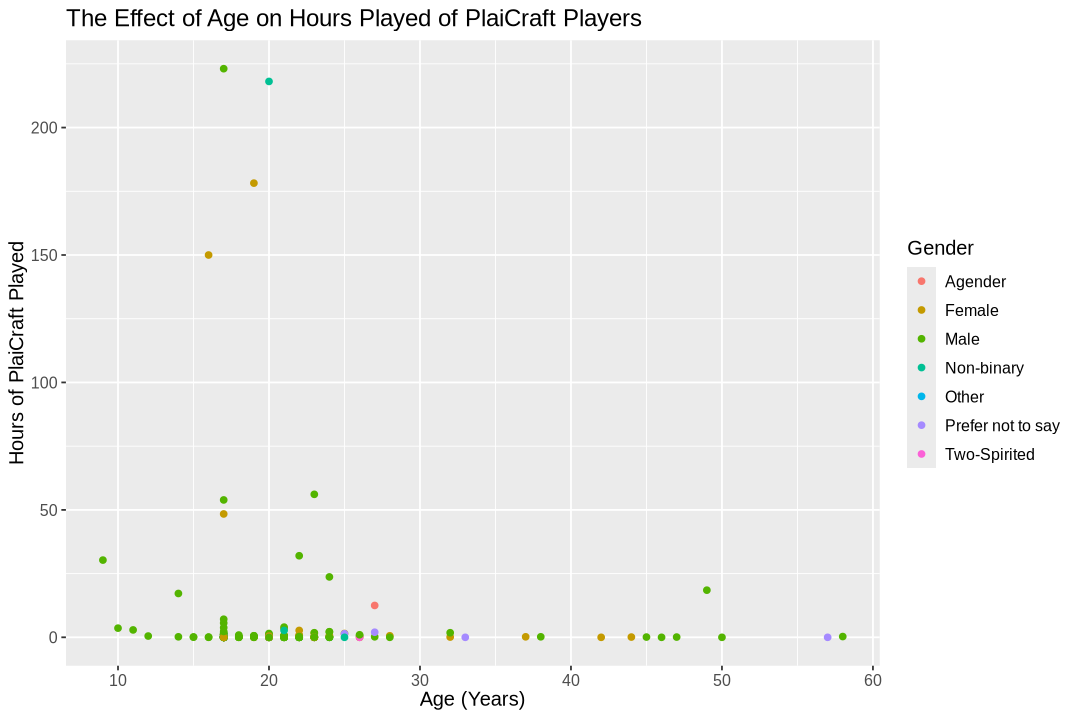

In [15]:
options(repr.plot.width = 9, repr.plot.height = 6)
played_hours_age_plot <- ggplot(players_data, aes(x = Age, y = played_hours, colour = gender)) +
                            geom_point() +
                            labs(x = "Age (Years)", y = "Hours of PlaiCraft Played", colour = "Gender") +
                            ggtitle("The Effect of Age on Hours Played of PlaiCraft Players") +
                            theme(text = element_text(size = 12))
played_hours_age_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


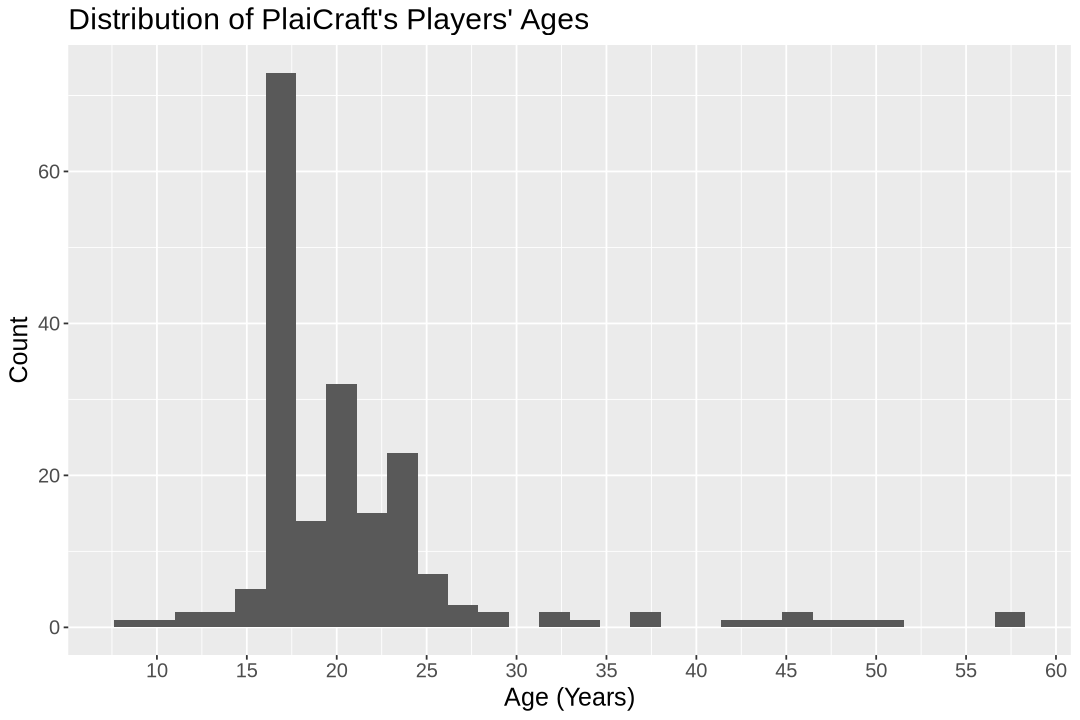

In [11]:
options(repr.plot.width = 9, repr.plot.height = 6)
age_histogram <- ggplot(players_data, aes(x = Age)) +
                    geom_histogram() +
                    labs(x = "Age (Years)", y = "Count") +
                    ggtitle("Distribution of PlaiCraft's Players' Ages") +
                    scale_x_continuous(breaks = c(0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75)) +
                    theme(text = element_text(size = 15))
age_histogram

In [23]:
distinct(players_data, gender)

gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


gender,total
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


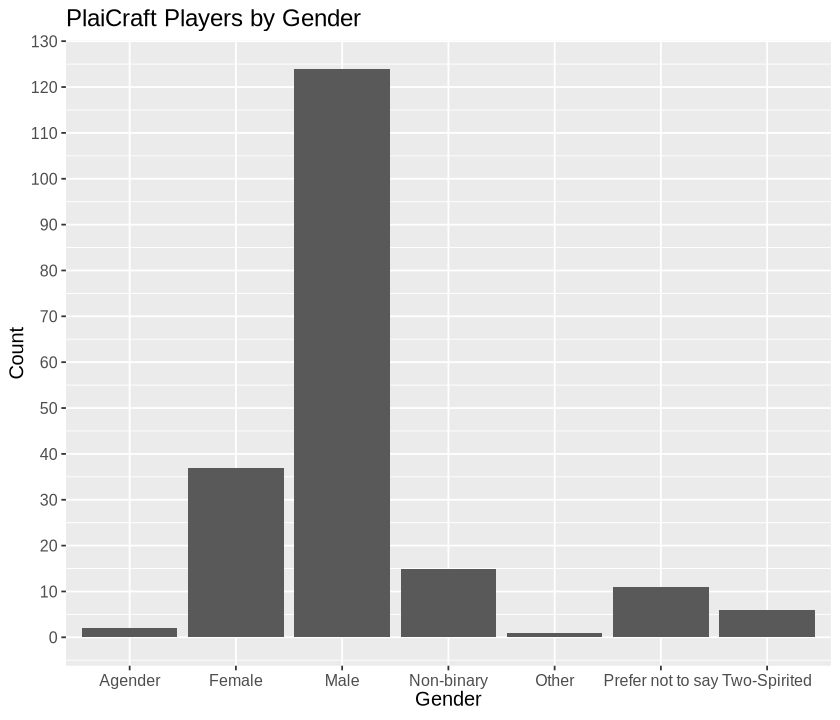

In [36]:
options(repr.plot.width = 7, repr.plot.height = 6)
gender_data <- players_data |>
                group_by(gender) |>
                summarize(total = n())
gender_data
gender_bar <- ggplot(gender_data, aes(x = gender, y = total)) +
                geom_bar(stat = "identity") +
                labs(x = "Gender", y = "Count") +
                ggtitle("PlaiCraft Players by Gender") +
                scale_y_continuous(breaks = c(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130)) +
                theme(text = element_text(size = 12))
gender_bar